In [2]:
import numpy as np
from matplotlib import pyplot as plt

from warper import simulate_2d, simulate_1d_only_memory

from multiprocessing import Pool

import os, pickle
from tqdm.notebook import tqdm

In [3]:
pool = Pool(10)

In [39]:
def get_RS(o0,g0,ka):

    mu = ka
    S = 1/ka**2/g0/2 * (g0*mu + o0**2 + ka**2)
    R = 1/ka**2/g0/o0**2/2 * (o0**2 + ka**2)
    return R,S

In [16]:
# params - o0,g0,th,ka

params = [(1,10,10),
          (1,10,15),
          (2,1,4),
          (10,11,1),
          (10,11,10),
          (10,11,1),
          (10,1,1),
          (10,1,12),
          (1,10,3),
          (1,2,4)]

In [42]:
get_RS(1,1000,0.1)

(0.050499999999999996, 5.0504999999999995)

In [67]:
params = [(1,1000,0.1),(1,1000,10)]

In [68]:
R = [get_RS(*a)[0] for a in params]
S = [get_RS(*a)[1] for a in params]

In [69]:
N=1000000
warmup=0
dt=0.0001
samples=100
skip=100
time = np.linspace(0,N//skip *dt, N//skip)

In [70]:
results = []
for o0,g0,ka in tqdm(params):
    R1,S1 = np.sqrt(get_RS(o0,g0,ka))
    kwargs = dict(x0=np.zeros(samples)+5*R1,v0=np.zeros(samples)+10*S1,
        N=N, samples=samples,
        dt=dt, warmup=warmup, skip=skip,
        omega0=o0,gamma0=g0,kappa=ka)
    results.append(simulate_1d_only_memory(pool,10,**kwargs))

In [71]:
results = np.array(results)

In [72]:
results.shape

(2, 3, 1000, 10000)

In [73]:
R_sample = results.var(axis=2)[:,0]
S_sample = results.var(axis=2)[:,1]

In [74]:
R_sample.shape

(2, 10000)

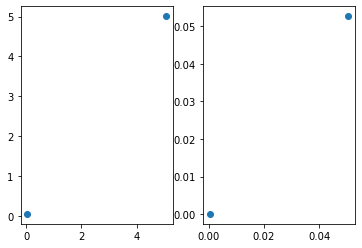

In [75]:
plt.subplot(121)
plt.scatter(S, S_sample[..., -1])
plt.subplot(122)
plt.scatter(R, R_sample[..., -1])

In [78]:
T=results[:,1]

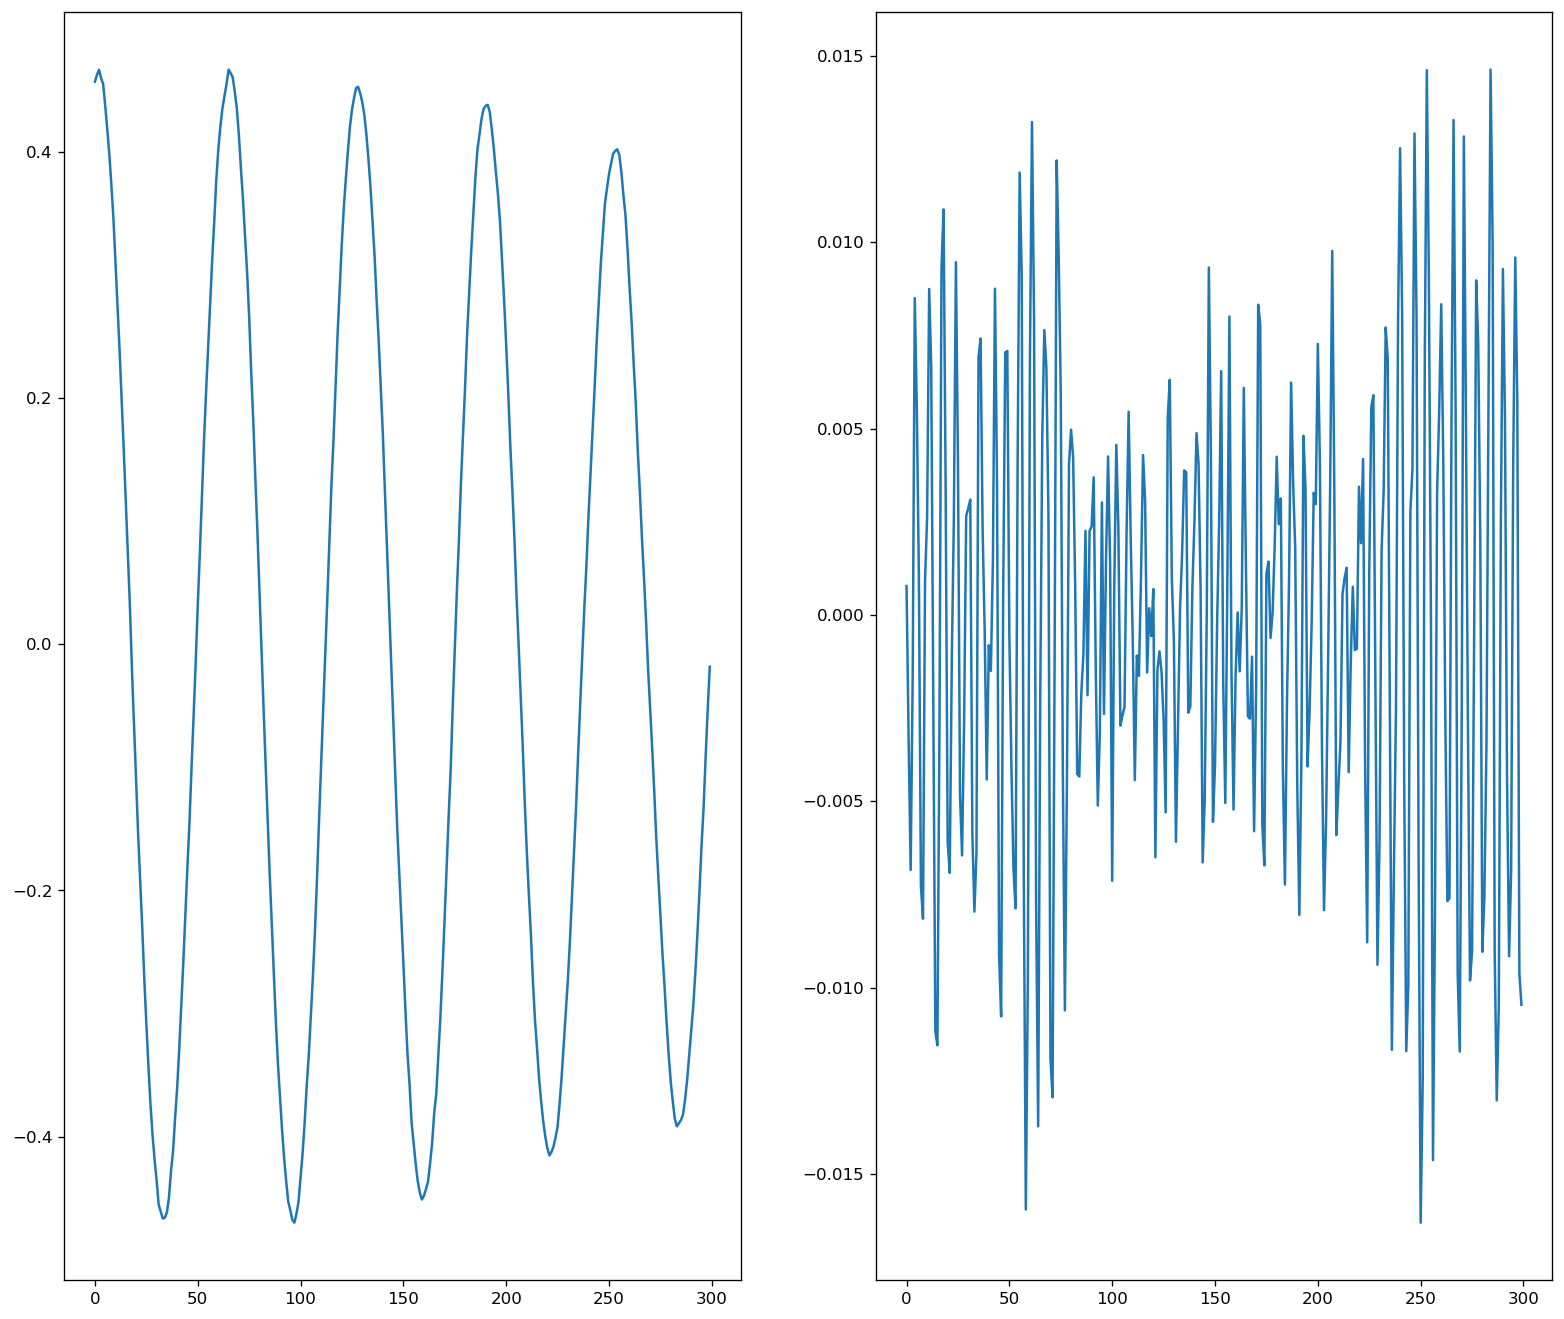

In [85]:
fig, axs = plt.subplots(T.shape[0]//2,2,figsize=(16,14),dpi=120)
for ax, xi in zip(axs.flatten(),T[:,:,:]):
#     ax.plot(time, xi.mean(axis=0))
    ax.plot(xi.mean(axis=0)[8000:][:300])    

In [54]:
results.shape

(2, 3, 1000, 10000)

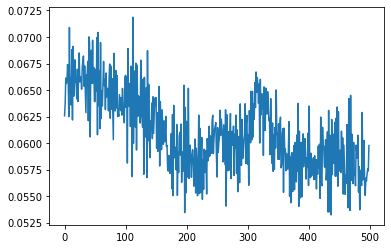

In [65]:
plt.plot(results[1,0,0,5000:5500])